<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Quantitative_Model_Assignment_ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment ML6
Use the same project from the previous assignment (the heuristic modeling), then:
1. Modify the heuristic model to a basic quantitative model.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv'
df = pd.read_csv(filepath)

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


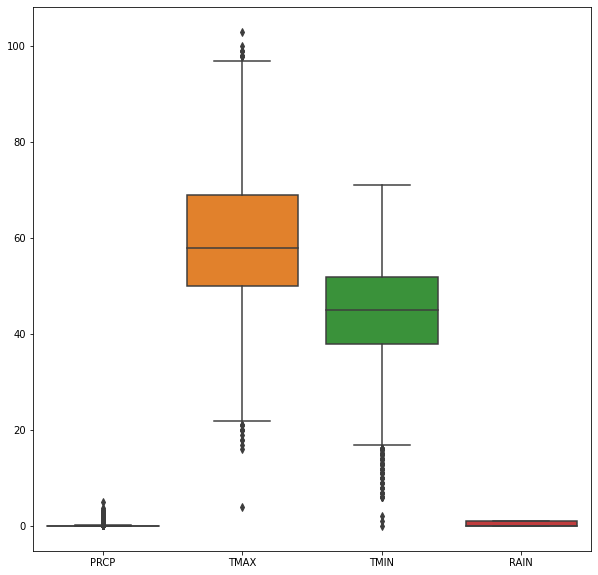

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

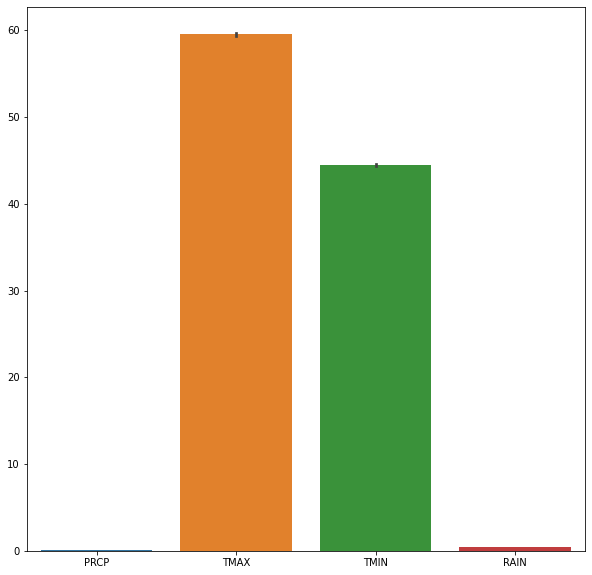

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


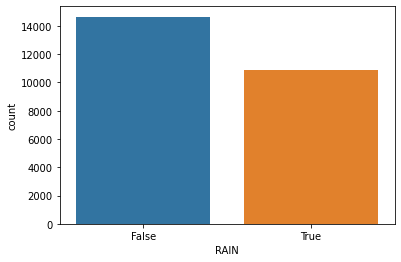

In [7]:
sns.countplot(df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


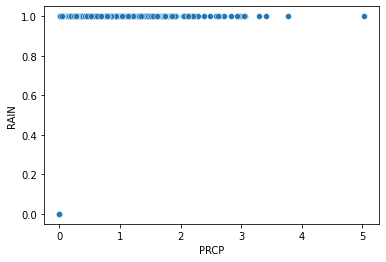

In [8]:
sns.scatterplot(df['PRCP'], df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


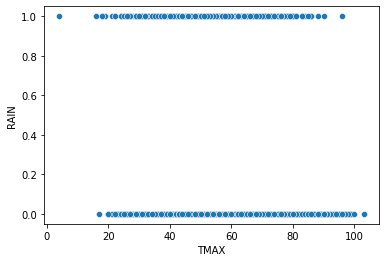

In [9]:
sns.scatterplot(df['TMAX'], df['RAIN'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


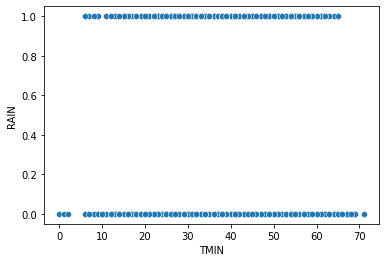

In [10]:
sns.scatterplot(df['TMIN'], df['RAIN'])

### Preparing the Seattle weather data

In [11]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [12]:
def isNull(df, column):
  return df[pd.isnull(df[column])]

In [13]:
isNull(df, 'PRCP')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [14]:
isNull(df, 'RAIN')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [15]:
#df['PRCP'] = df['PRCP'].fillna(df['PRCP'].median)
#isNull(df, 'PRCP')

In [16]:
#df['RAIN'] = df['RAIN'].fillna(False)
#isNull(df, 'RAIN')

In [17]:
df = df.dropna()

# Regression

---
### 1. Break the dataset into two parts, training and testing.


In [18]:
X = df.loc[:, ['PRCP', 'TMAX', 'TMIN']].values
y = df['RAIN'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Scaling

In [19]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

### Logistic Regression

In [20]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, reg.predict(X_train))*100)))

Training Accuracy: 93.0%


In [21]:
reg= LogisticRegression(random_state=42,max_iter=200)
reg.fit(X_train_scaled,y_train)
print("Training Accuracy with Scaled data: {}%".format(round(accuracy_score(y_train, reg.predict(X_train_scaled))*100)))

Training Accuracy with Scaled data: 97.0%


---
### 3. Evaluate both sets of data using your function.

In [24]:
import numpy as np
def SSE(y_test, y_pred):
  difference = y_test - y_pred
  squared_errors = difference ** 2
  return np.sum(squared_errors)

In [25]:
def evaluation(model, X, y):
  print("Accuracy: {}%".format(round(accuracy_score(y, model.predict(X))*100)))
  print("Precision: {}%".format(round(precision_score(y, model.predict(X))*100)))
  print("Recall: {}%".format(round(recall_score(y, model.predict(X))*100)))
  print("MSE: {}".format(mean_squared_error(y, model.predict(X))))
  sse = SSE(y_pred=model.predict(X), y_test=y.astype('int'))
  print("SSE: {}".format(sse))

In [26]:
# Logistic Regression
print("*"*50)
print('Logistic Regression')
print("*"*50)
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(reg, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(reg, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(reg, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(reg, X_test_scaled, y_test)
print('*'*30)

**************************************************
Logistic Regression
**************************************************
******************************
Training Performance
******************************
Accuracy: 64.0%
Precision: 100.0%
Recall: 16.0%
MSE: 0.36128779724043447
SSE: 7384
***************
Scaled Data
Accuracy: 97.0%
Precision: 100.0%
Recall: 92.0%
MSE: 0.03395635580780898
SSE: 694
******************************


******************************
Testing Performance
******************************
Accuracy: 65.0%
Precision: 100.0%
Recall: 16.0%
MSE: 0.35401174168297456
SSE: 1809
***************
Scaled Data
Accuracy: 97.0%
Precision: 100.0%
Recall: 92.0%
MSE: 0.03444227005870842
SSE: 176
******************************


### Extra: Confusion Matrix

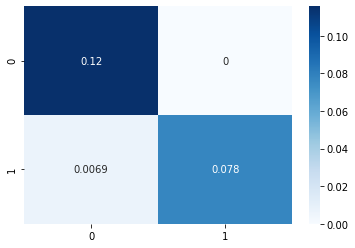

In [28]:
sns.heatmap(confusion_matrix(y_test, reg.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

# Classification

---
### 1. Break the dataset into two parts, training and testing.


In [30]:
X = df.loc[:, ['PRCP', 'TMAX', 'TMIN']].values
y = df['RAIN'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

---
### 2. Use the first 80% of the dataset for training and the last 20% for testing.

### Random Forest

In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, rf.predict(X_train))*100)))

Training Accuracy: 100.0%


In [32]:
# Scaled data
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
print("Training Accuracy with scaled data: {}%".format(round(accuracy_score(y_train, rf.predict(X_train_scaled))*100)))

Training Accuracy with scaled data: 100.0%


### KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, knn.predict(X_train))*100)))

Training Accuracy: 98.0%


In [34]:
# Scaled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
print("Training Accuracy with scaled data: {}%".format(round(accuracy_score(y_train, knn.predict(X_train_scaled))*100)))

Training Accuracy with scaled data: 99.0%


### Gradient Boosting 

In [35]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, gb.predict(X_train))*100)))

Training Accuracy: 100.0%


In [36]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
print("Training Accuracy with scaled data: {}%".format(round(accuracy_score(y_train, gb.predict(X_train_scaled))*100)))

Training Accuracy with scaled data: 100.0%


### SVC

In [37]:
svc= SVC()
svc.fit(X_train,y_train)
print("Training Accuracy: {}%".format(round(accuracy_score(y_train, svc.predict(X_train))*100)))

Training Accuracy: 78.0%


In [38]:
svc= SVC()
svc.fit(X_train_scaled,y_train)
print("Training Accuracy with Scaled data (SVC): {}%".format(round(accuracy_score(y_train, svc.predict(X_train_scaled))*100)))

Training Accuracy with Scaled data (SVC): 98.0%


---
### 3. Evaluate both sets of data using your function.

In [42]:
print("*"*50)
print('Random Forest')
print("*"*50)
print('\n')
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(rf, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(rf, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(rf, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(rf, X_test_scaled, y_test)
print('*'*30)

**************************************************
Random Forest
**************************************************


******************************
Training Performance
******************************
Accuracy: 43.0%
Precision: 43.0%
Recall: 100.0%
MSE: 0.5722184166748214
SSE: 11695
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


******************************
Testing Performance
******************************
Accuracy: 42.0%
Precision: 42.0%
Recall: 100.0%
MSE: 0.5778864970645793
SSE: 2953
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


In [43]:
print("*"*50)
print('KNN')
print("*"*50)
print('\n')
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(knn, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(knn, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(knn, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(knn, X_test_scaled, y_test)
print('*'*30)

**************************************************
KNN
**************************************************


******************************
Training Performance
******************************
Accuracy: 57.0%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0%
Recall: 0.0%
MSE: 0.42778158332517857
SSE: 8743
***************
Scaled Data
Accuracy: 99.0%
Precision: 100.0%
Recall: 98.0%
MSE: 0.0076817692533516
SSE: 157
******************************


******************************
Testing Performance
******************************
Accuracy: 58.0%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0%
Recall: 0.0%
MSE: 0.42211350293542077
SSE: 2157
***************
Scaled Data
Accuracy: 98.0%
Precision: 100.0%
Recall: 96.0%
MSE: 0.018003913894324854
SSE: 92
******************************


In [44]:
print("*"*50)
print('Gradient Boosting')
print("*"*50)
print('\n')
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(gb, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(gb, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(gb, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(gb, X_test_scaled, y_test)
print('*'*30)

**************************************************
Gradient Boosting
**************************************************


******************************
Training Performance
******************************
Accuracy: 43.0%
Precision: 43.0%
Recall: 100.0%
MSE: 0.5722184166748214
SSE: 11695
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


******************************
Testing Performance
******************************
Accuracy: 42.0%
Precision: 42.0%
Recall: 100.0%
MSE: 0.5778864970645793
SSE: 2953
***************
Scaled Data
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
MSE: 0.0
SSE: 0
******************************


In [45]:
print("*"*50)
print('SVC')
print("*"*50)
print('\n')
print('*'*30)
print("Training Performance")
print('*'*30)
evaluation(svc, X_train, y_train)
print('*'*15)
print('Scaled Data')
evaluation(svc, X_train_scaled, y_train)
print('*'*30)
print('\n')
print('*'*30)
print("Testing Performance")
print('*'*30)
evaluation(svc, X_test, y_test)
print('*'*15)
print('Scaled Data')
evaluation(svc, X_test_scaled, y_test)
print('*'*30)

**************************************************
SVC
**************************************************


******************************
Training Performance
******************************
Accuracy: 43.0%
Precision: 43.0%
Recall: 100.0%
MSE: 0.5722184166748214
SSE: 11695
***************
Scaled Data
Accuracy: 98.0%
Precision: 100.0%
Recall: 95.0%
MSE: 0.023289950092964088
SSE: 476
******************************


******************************
Testing Performance
******************************
Accuracy: 42.0%
Precision: 42.0%
Recall: 100.0%
MSE: 0.5778864970645793
SSE: 2953
***************
Scaled Data
Accuracy: 98.0%
Precision: 100.0%
Recall: 95.0%
MSE: 0.02172211350293542
SSE: 111
******************************


### Extra: Confusion Matrix

### RF

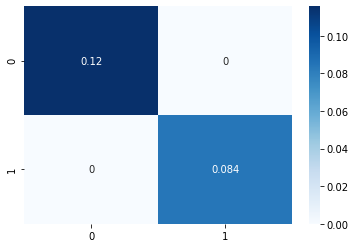

In [46]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

### KNN

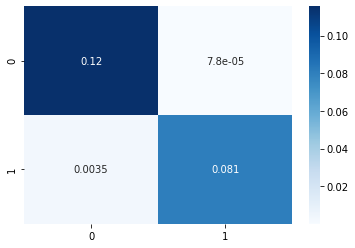

In [47]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

### Gradient Boosting

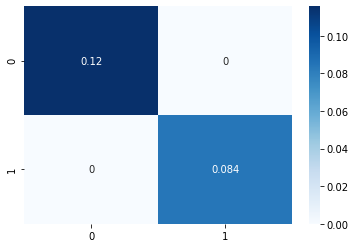

In [48]:
sns.heatmap(confusion_matrix(y_test, gb.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)

### SVC

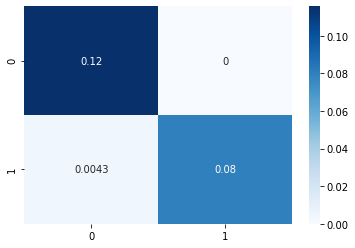

In [49]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test_scaled)) / len(y), cmap='Blues', annot=True)